# Linear Regression 

The basis of Data Science is Machine Learning, which involves training a machine (computer) to learn how to make predictions from data. There are two primary types of Machine Learning: supervised learning and unsupervised learning. In supervised learning we can divide the data into input values and output values, and then for new input values we require the machine to predict the output values. You can think of this as a mathematical function with multiple input values, the problem is that it in general it is very difficult to write down the function. For unsupervised learning we only have input values and we require the machine to label the data. Initially, we are only going to consider supervised learning, and in this lesson, introduce linear regression, which is the simplest example.

For supervised learning the data can be divided into features and targets. The features are the input values, and the targets are the output values. Typically each data point will have $n$ features and 1 target, and we have $m$ data points. Each of the data points is also referred to as instances or measurements. Hence, the data can be represented as a $(n+1) \times m$ table or matrix. Further, the data can be categorized into continuous and discrete variables. Discrete variables only have a distinct number of values or labels. For example, for census data the city you live in will be a discrete variable, whereas your age is a continuous variable. When we train a machine to predict continuous variables this is known as regression modelling, whereas when we train a machine to predict categorical variables this is known as classification modelling. In this lesson we will only deal with continuous variables.

Linear regression involves finding the linear relationship between the features which minimizes the error in predicting the output values. For only one feature, this is calculating the line of best fit, which you probably will have seen in Excel plots, and which we have already seen with `seaborn` scatter plots.

For this lesson we will use the  Diabetes dataset. This is a classical Machine Learning dataset which relates a number of physiological and blood serum features with the onset of Diabetes a year later. We will also import some standard libraries.

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('05-LinearRegression_Diabetes_Data.csv') # read the Diabetes dataset in to a pandas dataframe

## Contents

* Correlation coefficients
* One-dimensional regression
* Testing and training
* Two-dimensional regression
* Exercises

## Correlation coefficients

We will first investigate the Diabetes data. The first two features are self-explanatory, then `BP` is blood pressure in mm of Hg, `BMI` is body mass index (a healthy range for adults is 18.5 to 25) and `S1`-`S6` are various blood serum measurements. `Y` is the target variable, and is a measure of disease progression one year after the original measurements. The aim is to predict `Y` from the other variables.

In [4]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


We can look at the the descriptive statistics. Everything looks fine as the count for all the variables is the same, the minimum values are all negative and the standard deviation is less than the mean. 

In [5]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


One last check we can make for missing values is to use `df.isna()`. This checks for NaN (not a number) and returns the answer as False (0) or True (1). If we sum this over each column, then if there are no missing values the answer will be zero, other it will be a positive integer. Since the answer is zero for each column, there are no missing values for this data.

In [6]:
df.isna().sum()

AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64

Here the field `SEX` only has the two values 2 and 1, and corresponds to categorical data. For linear regression we need to use a technique called 'One Hot Encoding' to deal with categorical data, however we are not going to use the `SEX` field here, so we will defer that to later lessons.

In [7]:
df['SEX'].unique()

array([2, 1], dtype=int64)

We can look at the variable correlations to search for patterns. `SEX` doesn't seem to be important in predicting `Y`, and `AGE`, `S1` and `S2` are only marginally important. The most important variables seem to be `BMI`, `BP`, `S4` and `S5`. Note that there is a strong correlation between `S1` and `S2`, and `S3` and `S4`.

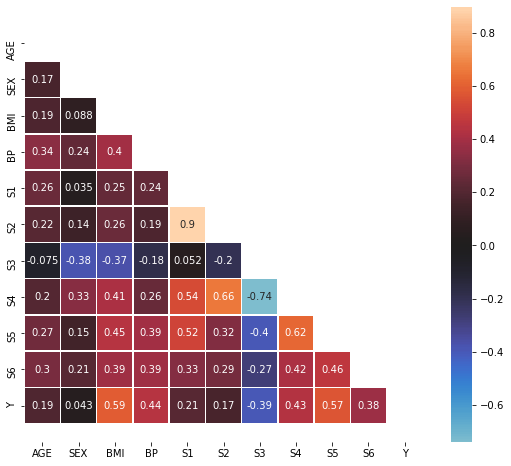

In [8]:
corrs = df.corr() # calculate the correlation table
#corrs
# as this is a symmetric table, set up a mask so that we only plot values below the main diagonal
mask = np.triu(np.ones_like(corrs, dtype=np.bool)) 
f, ax = plt.subplots(figsize=(10, 8)) # initialise the plots and axes
# plot the correlations as a seaborn heatmap, with a colourbar
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5) 
# do some fiddling so that the top and bottom are not obscured
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5);

We will investigate the relationship between different pairs of variables to understand the correlation coefficients. Consider first the relation between `S1` and `S2`, which has a correlation coefficient of 0.9. Plotting the two variables it is apparent that there is a strong linear relationship, where as `S1` increases, so does `S2`. The line of best fit is automatically calculated by `seaborn`, and as the correlation coefficient is quite high, the confidence bands are very tight.

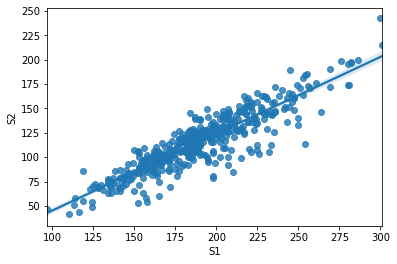

In [9]:
sns.regplot(data=df, x='S1', y='S2');

The line of best fit can be calculated using the `numpy` routines `np.polyfit()` and `np.poly1d()`. The first of these fits a polynomial through the given `x` and `y` datapoints. The order of the polynomial is specified by the third argument, which, since we require a line, is 1. The line of best fit is calculated here by minimizing the least squares error. This can be converted into an optimization problem, which can be solved using linear algebra. `np.poly1d()` converts this to a formatted polynomial.

Here we can see that as the correlation coefficient is positive, the slope of the line is also positive.

In [10]:
p1 = np.poly1d(np.polyfit(df['S1'], df['S2'], 1))
print(p1)

 
0.788 x - 33.6


The correlation coefficient can now be understood in terms of the line of best fit for the normalized variables. Normalizing the variables involves transforming the variables so that they have similar distributions. In particular we subtract the mean and divide by the standard deviation (the characteristic spread of the variables). Therefore the normalized variables will have mean=0 and standard deviation=1. Plotting the original and normalized version of `S1`, we can see that is now the case.

Text(0.5, 1.0, 'Original distribution')

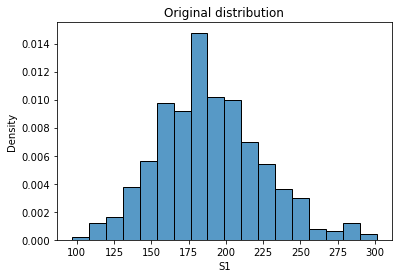

In [11]:
X = df['S1']
Y = df['S2']
Xn = (X-X.mean())/X.std();
Yn = (Y-Y.mean())/Y.std();

sns.histplot(X, stat='density');
plt.title('Original distribution')

Text(0.5, 1.0, 'Normalized distribution')

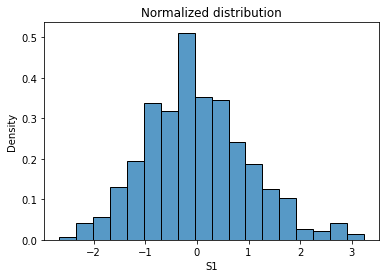

In [12]:
sns.histplot(Xn, stat='density');
plt.title('Normalized distribution')

We can repeat the plotting and calculation of the line of best for the normalized variables. Now it is apparent that the slope of the line is the correlation coefficient.

Line of best fit is  
0.8967 x + 1.093e-15


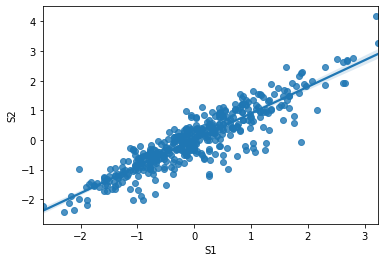

In [13]:
sns.regplot(x=Xn, y=Yn);
p1 = np.poly1d(np.polyfit(Xn, Yn, 1))
print('Line of best fit is', p1)

Let $X$ and $Y$ be our original variables. Therefore if $R$ is the correlation between $X$ and $Y$, the standard deviation of $X$ is $\sigma_X$ and the standard deviation of $Y$ is $\sigma_Y$, then if $X$ changes by 1, the typical change in $Y$ will be

$$ \frac{\sigma_Y R}{\sigma_X}. $$

Consider the relationship between `S3` and `S4`, where the correlation coefficient is negative. Now as `S3` increases, `S4` decreases and vice-versa.

 
-0.07368 x + 7.739


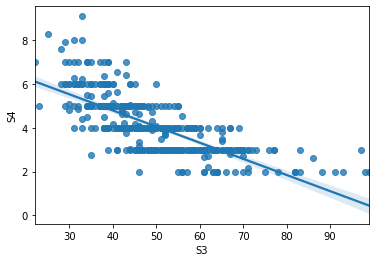

In [14]:
X = df['S3'] 
Y = df['S4'] 

sns.regplot(x=X, y=Y);
p1 = np.poly1d(np.polyfit(X, Y, 1))
print(p1)

Again the correlation coefficient is the slope of the line of best fit for the normalized variables.

 
-0.7385 x - 2.2e-16


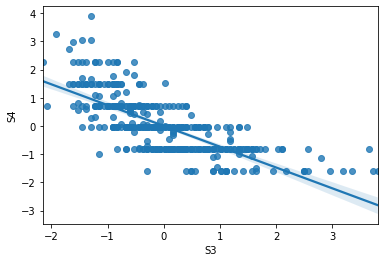

In [15]:
Xn = (X-X.mean())/X.std();
Yn = (Y-Y.mean())/Y.std();

sns.regplot(x=Xn, y=Yn);
p1 = np.poly1d(np.polyfit(Xn, Yn, 1))
print(p1)

Finally, consider when the correlation is close to zero, as for `S1` and `S3`. In this case there is no clear relationship between the two variables, so the line of best fit is almost horizontal.

 
0.01925 x + 46.15


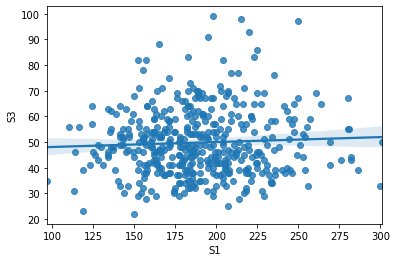

In [16]:
X = df['S1']
Y = df['S3']

sns.regplot(x=X, y=Y);
p1 = np.poly1d(np.polyfit(X, Y, 1))
print(p1)

Since the correlation coefficient is close to zero, then it is difficult to say there is a typical change in $Y$ for a given change in $X$.

 
0.05152 x - 9.916e-17


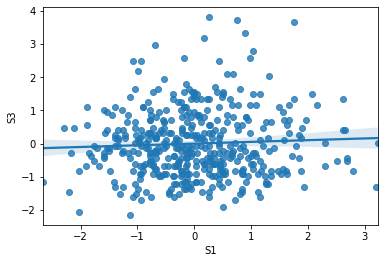

In [17]:
Xn = (X-X.mean())/X.std();
Yn = (Y-Y.mean())/Y.std();

sns.regplot(x=Xn, y=Yn);
p1 = np.poly1d(np.polyfit(Xn, Yn, 1))
print(p1)

## One-dimensional regression

Most of the required machine learning algorithms are implemented in a Python package called `sklearn` (SciKit Learn). Here we will show how this can be used to perform linear regression and create our first machine learning model. For this there are three routines we need to import, `LinearRegression()` which creates the model, `train_test_split()` which splits the data into training and testing sets, and `r2_score()` which is used to calculate the correlation coefficient between the data target values and the predicted target values.

In [18]:
from sklearn.linear_model import LinearRegression # linear regression model
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.metrics import r2_score # for comparing the predicted and test values

To understand linear regression we need to introduce some notation. To commence, assume we have one feature and one target for each data point, we can then label the data points as $(X_j, Y_j)$ where $j$ ranges from $1$ to $n$, or we can introduce the shorthand $j=1,\dots,m$. Then the objective of linear regression is to find the line of best fit, such that

$$ Y(X_j) = \beta X_j + c, \quad j=1,\dots,m, $$

and

$$ \sum_{j=1}^m (Y_j-Y(X_j))^2 = (Y_1-Y(X_1))^2+(Y_2+Y(X_2))^2+\cdots+(Y_m-Y(X_m))^2, $$

is a minimum.

For `sklearn` the models generally have the same interface, and the steps are:

1. Instantatiate (setup) the model.
2. Fit the data to the model.
3. Score the model to test how effective it is.

Fitting the data to the model is done with the method `model.fit(X, Y)`, while calculating the score of the model is done with the method `model.score(X, Y)`. For Linear Regression the default score is the 'R2 score', which calculates the square of the correlation coefficient (R squared) for the predicted model labels $Y(X_j)$ and the actual labels $Y_j$. This will be a value between 0 and 1: for values close to 1 the model is very good, and for values close to 0 the model is very poor. If this score is calculated with the values used to fit the model, this is known as the 'training score'. 

The model also has a number of objects associated with it. The two that we are particularly interested in are `model.coef_`, which returns the coefficients of the X values for the model (the $\beta$ value above), and `model.intercept_`, which returns the linear intercept for the model (the $c$ value above). Note that to calculate the intercept we need to use `fit_intercept=True` when we setup the model, otherwise this is not calculated.

Our first calculation is to create a model which attempts to predict the onset of Diabetes (`Y`) using `BMI`. Note that the square root of the training score is approximately equal to the correlation coefficient between these two values which we calculated earlier. The difference is due to the fact that the Linear Regression model takes a random sample of the data.

In [19]:
X = df[['BMI']] # create a dataframe with just the BMI values
Y = df['Y'] # create a dataframe with just the Y values

linear = LinearRegression(fit_intercept=True) # instantatiate the linear regression model
linear.fit(X, Y) # fit the data to the model
training_score = linear.score(X, Y) # calculate rsq for the training set

print("Training score is",np.round(training_score, 3))#R^2
print("Correlation score is",np.round(np.sqrt(training_score), 3))#R
print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))

Training score is 0.344
Correlation score is 0.586
Coefficients are [10.233]
Intercept is -117.773


The best fit line is then:


$ \hat{y} = \beta x + c = 10.233x -117.773 $

The $\beta$ coefficient is interpretted as the change in $\hat{y}$ (the outcome variable) for a one unit increase in $x$.In other words, if we increase the value of $x$ (the BMI) from say 19 to 20, we would expect $\hat{y}$ to increase by 10.233, on average. The standard way for writing up a interpetation like this is:

"For a one-unit increase in BMI, the measure of disease progression increases by 10.233, on average." 

The value for $c$ is the $y$-intercept. So, if we set $x$ (the BMI) to 0, then we would expect $\hat{y}$ to be -117.773, on average.




## Testing and training

One significant problem with the model is that the score that has been calculated is based on the data that has been used to fit the model, rather than data that the model has not seen. In practice we want to know how effective the model will be on unseen data, as this is how a Machine Learning model would be implemented. Hence, what we can do is split the data into training and testing sets, and calculate model scores for each of these sets. Then the score of particular interest is the testing score, as this gives a more accurate measure of how well the model will be on unseen data. Note that typically we would expect the training score to be slightly better than the testing score, as this is biased towards the noise in the training set. 

To split the data into training and testing sets we can use the `sklearn` function `train_test_split()`. This returns training and testing sets for the features and labels, and by default creates a random split for which the training set is approximately 80% of the data and the testing set is approximately 20% of the data. To change this we can use the argument `test_size`. We can also specify a random seed for `random_state`, which ensures that that random split is the same each time we run the cell.

To calculate the the testing score we calculate the predictions of the model for the testing set using `model.predict()`, and then calculate the 'R squared' score for the predicted and actual labels for the testing set using the function `r2_score()`. As is apparent the training score is slightly higher than the testing score.

In [20]:
# split into a training set with 80% of the data, and a testing set as the remainder
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=42) 
linear = LinearRegression(fit_intercept=True) # instantatiate the linear regression model
linear.fit(X_train,Y_train) # fit the data to the model
training_score = linear.score(X_train,Y_train) # calculate rsq for the training set
#testing score, as this gives a more accurate measure of how well the model will be on unseen data.
#training score to be slightly better than the testing score, as this is biased towards the noise in the training set.

In [21]:
# use the independent variables for the testing set to predict the target variable
preds_linear = linear.predict(X_test) 
# calculate the correlation of the predicted and actual target variables
rsquared_linear = r2_score(Y_test,preds_linear) 
# print the training and testing scores
print("Training score is",np.round(training_score, 3))
print("Testing score is",np.round(rsquared_linear, 3))

Training score is 0.328
Testing score is 0.321


We can also evaluate the model by plotting the predicted test values against the actual test values, and plotting the line of best fit for this data. This is compared against the line $x=y$, which is shown in orange, and will alway have a greater slope that the line of best fit. 

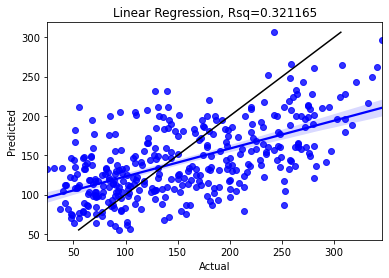

In [22]:
sns.regplot(x=Y_test, y=preds_linear,color='b');
sns.lineplot(x=preds_linear, y=preds_linear,color='black');
# add a title including the correlation coefficient
plt.title("Linear Regression, Rsq=%f" % rsquared_linear)
plt.ylabel("Predicted") # xlabel
plt.xlabel("Actual"); # ylabel

## Two-dimensional regression

If we have multiple features then each data point consists of the features $X_j = (X_{1,j}, X_{2,j}, \dots, X_{n,})$ and label $Y_j$ for $j=1,\dots,m$. Then the objective of linear regression is to obtain the hyperplane (multi-dimensional linear surface), such that

$$ Y(X_j) = \beta_1 X_{1,j} + \beta_2 X_{2,j} + \cdots + \beta_n X_{n,j} + c, \quad j=1,\dots,m, $$

and

$$  \sum_{j=1}^m (Y_j-Y(X_j))^2 = (Y_1-Y(X_1))^2+(Y_2+Y(X_2))^2+\cdots+(Y_m-Y(X_m))^2, $$

is a minimum. Again this can be written as an optimization problem and solved using linear algebra.

If we have two features, then we are looking for the plane of best fit

$$ Y(X_j) = \beta_1 X_{1,j} + \beta_2 X_{2,j} + c, \quad j=1,\dots,m. $$


Here we use the two features 'BMI' and 'BP' to create a linear model. Now there are two coefficients for the model, corresponding respectively to the coefficients of 'BMI' and 'BP'. Note that the coefficient of 'BMI' is not the same as for the one-dimensional model.

In [23]:
X = df[['BMI', 'BP']]
Y = df['Y'] 

# split into a training set with 80% of the data, and a testing set as the remainder
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=42) 

linear = LinearRegression(fit_intercept=True) # instantatiate the linear regression model
linear.fit(X_train,Y_train) # fit the data to the model

print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))

Coefficients are [8.022 1.903]
Intercept is -252.153


The best fit hyperplane is then:

$ \hat{y} = \beta_1 x_1 + \beta_2 x_2 + c = 8.022x_1 + 1.903x_2 -252.153 $

The $\beta_1$ coefficient is interpretted as the change in $\hat{y}$ for a one unit increase in $x_1$, holding $x_2$ constant. In other words, if we increase the value of $x_1$ (the BMI) from say 19 to 20, and we pick a constant value for $x_2$, say, 87, would expect $\hat{y}$ to increase by 8.022, on average. Similarly, if we increase the value of $x_2$ (the BP) from say 87 to 88, and we pick a constant value for $x_1$, say, 25, would expect $\hat{y}$ to increase by 1.903, on average.

The standard way to write interpretations like this is:

"For a one unit increase in BMI, the measure of disease progression increases by 8.022, on average, controlling for blood pressure. For a one unit increase in blood pressure, the measure of disease progression increases by 1.903, on average, controlling for BMI." 


The value for $c$ is the $y$-intercept. So, if we set $x_1$ and $x_2$, then we would expect $\hat{y}$ to be -252.153


We can calculate the testing and training scores, and with the addition of another feature we see that there is an increase in both accuracies. We would hope that in general as we add more features the accuracy would increase, but due to complicating factors this is not always the case. This will be explored more in this and future studios.

In [24]:
training_score = linear.score(X_train,Y_train) # calculate rsq for the training set
# use the independent variables for the testing set to predict the target variable
preds_linear = linear.predict(X_test) 
# calculate the correlation of the predicted and actual target variables
rsquared_linear = r2_score(Y_test,preds_linear) 
# print the training and testing scores
print("Training score is",np.round(training_score, 3))
print("Testing score is",np.round(rsquared_linear, 3))

Training score is 0.442
Testing score is 0.338


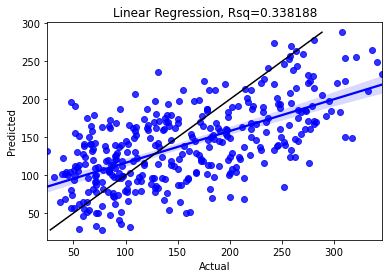

In [25]:
sns.regplot(x=Y_test, y=preds_linear,color='b');
sns.lineplot(x=preds_linear, y=preds_linear,color='black');
# add a title including the correlation coefficient
plt.title("Linear Regression, Rsq=%f" % rsquared_linear)
plt.ylabel("Predicted") # xlabel
plt.xlabel("Actual"); # ylabel

## Exercises

### Exercise 1

Using the diabetes data, construct a regression model that regresses the outcome variable Y on BMI and S5 using training and test data. Interpret the regression coefficients. Compare the testing scores of this model to those from the last example in the notebook. Which model performs better?


In [62]:
from sklearn.linear_model import LinearRegression # linear regression model
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.metrics import r2_score # for comparing the predicted and test values

TypeError: expected 1D vector for x

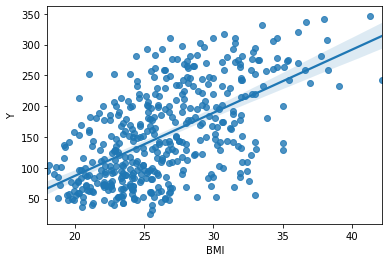

In [94]:
X = df[['BMI']]
Y = df['Y'] 
sns.regplot(x=X,y=Y)
original=np.poly1d(np.polyfit(X,Y,1))
print(original)
X= df[['BMI','S5']]
Y = df['Y'] 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.8,random_state=42)
linear =LinearRegression(fit_intercept=True)
linear.fit(X_train, Y_train)
training=linear.score(X_train,Y_test)
pred= linear.predict(X_train)
sqa = r2_score(Y_train,pred)
print('training score which is ',np.round(training,3))
print('test score which is',np.round(sqa,3))

In [97]:
X= df[['BMI','S5']]
Y = df['Y'] 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.8,random_state=42)
linear =LinearRegression(fit_intercept=True)
linear.fit(X_train,Y_train)
print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))
training_score=linear.score(X_train,Y_train)
preds_linear =linear.predict(X_test)
rsqua =r2_score(Y_test,preds_linear)
print('training score is',np.round(training_score,3))
print('test score is ',np.round(rsqua,3))

Coefficients are [ 8.399 36.101]
Intercept is -246.239
training score is 0.374
test score is  0.439


In [ ]:
#this model is more accurate than the previous one because it has higher test score 0.439 than 0.338 

### Exercise 2

Given the following training and test sets for the "mpg" data, create a regression plot that shows the relationship between the mpg and weight variables. Next, fit a linear regression model to the training data. Print and interpret the regression coefficient. 

Next, use the model to predict the mpg values in the test data. How does the model perform according to the testing score?


In [72]:
X=df['weight']
Y=df['mpg']

KeyError: 'weight'

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [88]:
cars_x_train = pd.read_csv("cars_x_train.csv", index_col= 0)
cars_y_train = pd.read_csv("cars_y_train.csv", index_col= 0)
cars_x_test = pd.read_csv("cars_x_test.csv", index_col= 0)
cars_y_test = pd.read_csv("cars_y_test.csv", index_col= 0)

 
-0.01517 x + 75.83
 
-0.007716 x + 46.3


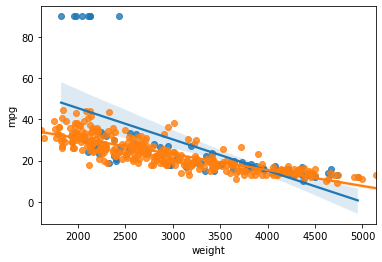

In [93]:
X=cars_x_train['weight']
Y=cars_y_train['mpg']
sns.regplot(x=X,y=Y)
a=np.poly1d(np.polyfit(X,Y,1))
print(a)
X1=cars_x_test['weight']
Y1=cars_y_test['mpg']
sns.regplot(x=X1,y=Y1)
a1=np.poly1d(np.polyfit(X1,Y1,1))
print(a1)

### Exercise 3

Use `sns.boxplot` to determine whether there are outliers in the mpg data. Next, remove the outliers from the data (hint: use `df.drop` and the `index` argument). Re-train the model and plot the regression line. Finally, use the new model to predict the mpg scores on the test data. How does the model compare to the model in exercise 2 in terms of the testing score?

NameError: name 'drop_list' is not defined

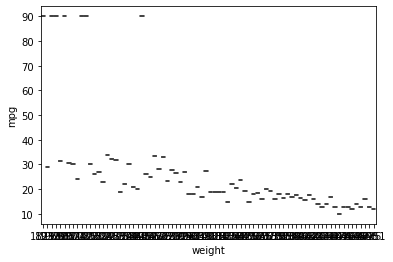

In [95]:
sns.boxplot(x = cars_x_train['weight'],y = cars_y_train['mpg'])

cars_y_train = cars_y_train.drop(index = drop_list, axis = 1)
cars_x_train = cars_x_train.drop(index = drop_list, axis = 1)
linear = LinearRegression(fit_intercept = True)
linear.fit(cars_x_train,cars_y_train)
training_score = linear.score(cars_x_train,cars_y_train)
print('training score is ',np.round(training_score,3))
print('corelation score is ',np,round(np.sqrt(training_score),3))
print('coefficients is ',np,round(linear.coef_,3))
print('intercepts is ',np.round(linear.intercept_,3))

X = cars_x_train['Weight']
Y= cars_y_train['mpg']
sns.regplot(x=X,y=Y)
p2 = np.polyld(np.polyfit(X,Y,1))